In [1]:
import pandas as pd
import glob
import numpy as np
import json
import math
from natsort import natsorted

# combine all telegram channels

In [4]:
json_files=natsorted(glob.glob("/home/ravi/raviProject/DATA/3ExtractRepliesAloneChosen/*.json"))

In [5]:
len(json_files)

17

In [11]:
json_files

['/home/ravi/raviProject/DATA/3ExtractRepliesAloneChosen/AlexJones.json',
 '/home/ravi/raviProject/DATA/3ExtractRepliesAloneChosen/AnalyzingAmerica.json',
 '/home/ravi/raviProject/DATA/3ExtractRepliesAloneChosen/AnticapitalistSurrealism.json',
 '/home/ravi/raviProject/DATA/3ExtractRepliesAloneChosen/BlackCrimesMatter.json',
 '/home/ravi/raviProject/DATA/3ExtractRepliesAloneChosen/COVIDVACCINEVICTIMS.json',
 '/home/ravi/raviProject/DATA/3ExtractRepliesAloneChosen/DonaldTrumpJr.json',
 '/home/ravi/raviProject/DATA/3ExtractRepliesAloneChosen/FreedomFighters.json',
 '/home/ravi/raviProject/DATA/3ExtractRepliesAloneChosen/InfoWars.json',
 '/home/ravi/raviProject/DATA/3ExtractRepliesAloneChosen/LacansWhreHouse.json',
 '/home/ravi/raviProject/DATA/3ExtractRepliesAloneChosen/PatriotStreetfighter.json',
 '/home/ravi/raviProject/DATA/3ExtractRepliesAloneChosen/PrayingMedic.json',
 '/home/ravi/raviProject/DATA/3ExtractRepliesAloneChosen/ResisttheMainstream.json',
 '/home/ravi/raviProject/DATA/3Ex

In [6]:
df = pd.concat([pd.read_json(f, orient='records') for f in json_files], ignore_index=True)

In [7]:
df.head(5)

,msgDate,msg,replyDate,reply,telegramChannel
0,1611529552,Leftist Eviro. Plan For Total Planetary Serfdo...,1611532985,"Keep on keepin’ on. May the Trinity, the Fathe...",AlexJones.json
1,1611529552,Leftist Eviro. Plan For Total Planetary Serfdo...,1611538372,They are really messing with the signal right ...,AlexJones.json
2,1611529552,Leftist Eviro. Plan For Total Planetary Serfdo...,1611540892,,AlexJones.json
3,1611529552,Leftist Eviro. Plan For Total Planetary Serfdo...,1611541436,Wow comments are on.,AlexJones.json
4,1611529552,Leftist Eviro. Plan For Total Planetary Serfdo...,1611542543,The other day when I called in and spoke with ...,AlexJones.json


In [8]:
df['telegramChannel'].nunique()

17

In [9]:
df.to_json("/home/ravi/raviProject/DATA/allChatsRepliesCombined.json", orient='records')

In [10]:
df.shape

(2368031, 5)

## filter URLs, then empty replies

In [12]:
df = pd.read_json("/home/ravi/raviProject/DATA/allChatsRepliesCombined.json", orient='records')

In [13]:
df.shape

(2368031, 5)

In [14]:
# Remove URLs from 'reply' column
df['reply'] = df['reply'].str.replace(r'http\S+|www.\S+', '', regex=True)

# Remove rows with empty or NaN values 
df = df.dropna(subset=['reply'])

# Remove URLs from 'msg' column
df['msg'] = df['msg'].str.replace(r'http\S+|www.\S+', '', regex=True)

# Remove rows with empty or NaN values 
df = df.dropna(subset=['msg'])

In [15]:
df.to_json("/home/ravi/raviProject/DATA/allChatsRepliesCombinedFilteredUrlNaN.json", orient='records')

In [17]:
df.shape

(2301110, 5)

## Timeline plot RAW data

In [18]:
df = pd.read_json("/home/ravi/raviProject/DATA/allChatsRepliesCombinedFilteredUrlNaN.json", orient='records')

(1832, 3)


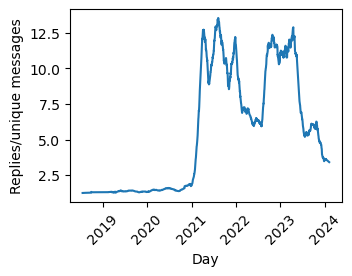

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Convert date columns to datetime
df['msgDate'] = pd.to_datetime(df['msgDate'], unit='s')
df['replyDate'] = pd.to_datetime(df['replyDate'], unit='s')

# Extract the day from the 'msgDate' column
df['msgDay'] = df['msgDate'].dt.date

# Group by 'msgDay' and calculate counts
grouped = df.groupby('msgDay').agg({'msg': 'nunique', 'reply': 'count'})

# Calculate the ratio of replies to unique messages
grouped['ratio'] = grouped['reply'] / grouped['msg']

print(grouped.shape)

# Apply Savitzky-Golay filter to the 'ratio' column
window_length = 51
polyorder = 1
grouped['smooth_ratio'] = savgol_filter(grouped['ratio'], window_length, polyorder)

# Plot the ratio
plt.figure(figsize=(3.5, 2.5))
plt.plot(grouped.index, grouped['smooth_ratio'])
plt.xlabel('Day')
plt.ylabel('Replies/unique messages')
# plt.title('Ratio of Replies to Unique Messages by Day')
plt.xticks(rotation=45)

plt.savefig('/home/ravi/raviProject/DATA/allChatsRepliesCombinedFilteredUrlNaN_msgByreplyRatioVDay.png', format='png', dpi=1200, bbox_inches='tight')

plt.show()

In [20]:
grouped.head(1), grouped.tail(1)

(            msg  reply    ratio  smooth_ratio
 msgDay                                       
 2018-07-21   81    118  1.45679      1.247784,
             msg  reply  ratio  smooth_ratio
 msgDay                                     
 2024-02-06   10     42    4.2      3.412748)

## Timeline plot for each channel

17


Locator attempting to generate 2231 ticks ([17631.0, ..., 19861.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2231 ticks ([17631.0, ..., 19861.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2231 ticks ([17631.0, ..., 19861.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2231 ticks ([17631.0, ..., 19861.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2231 ticks ([17631.0, ..., 19861.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2231 ticks ([17631.0, ..., 19861.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2231 ticks ([17631.0, ..., 19861.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2231 ticks ([17631.0, ..., 19861.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2231 ticks ([17631.0, ..., 19861.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to genera

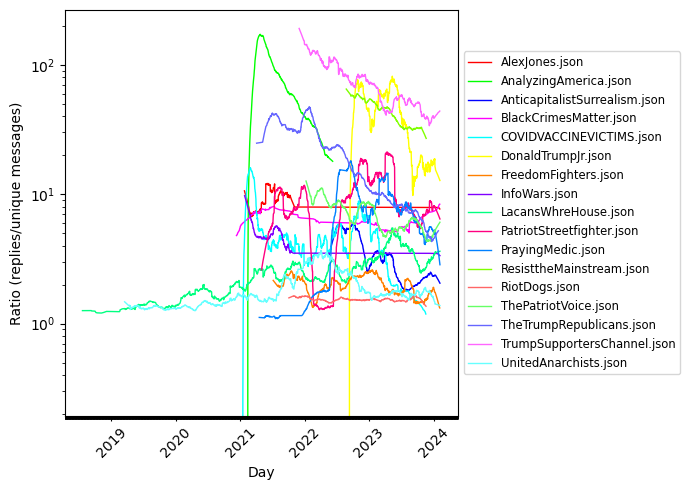

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from matplotlib.ticker import MultipleLocator

data = pd.read_json("/home/ravi/raviProject/DATA/allChatsRepliesCombinedFilteredUrlNaN.json", orient='records')

chats = data['telegramChannel'].unique()

print(len(chats))

plt.figure(figsize=(7, 5))

# Custom color palette
colors = ['#FF0000', '#00FF00', '#0000FF', '#FF00FF', '#00FFFF', '#FFFF00',
          '#FF8000', '#8000FF', '#00FF80', '#FF0080', '#0080FF', '#80FF00',
          '#FF6666', '#66FF66', '#6666FF', '#FF66FF', '#66FFFF'] #, '#FFFF66',
        #   '#9900CC', '#CC0099', '#FF99FF']

for idx, name in enumerate(chats):
    df = data.copy()
    df = df[df['telegramChannel'] == name]
    df['msgDate'] = pd.to_datetime(df['msgDate'], unit='s')
    df['replyDate'] = pd.to_datetime(df['replyDate'], unit='s')
    df['msgDay'] = df['msgDate'].dt.date
    grouped = df.groupby('msgDay').agg({'msg': 'nunique', 'reply': 'count'})
    grouped['ratio'] = grouped['reply'] / grouped['msg']
    
    window_length = 51
    polyorder = 1
    if len(grouped) >= window_length:
        grouped['smooth_ratio'] = savgol_filter(grouped['ratio'], window_length, polyorder)
    else:
        grouped['smooth_ratio'] = grouped['ratio']
    
    plt.plot(grouped.index, grouped['smooth_ratio'], label=name, color=colors[idx], linewidth=1)
    
plt.xlabel('Day')
plt.ylabel('Ratio (replies/unique messages)')
plt.xticks(rotation=45)

# Add micro grid
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

# Place the legend below the x-label at the bottom
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fontsize='small')

plt.yscale('log')

plt.tight_layout()

plt.savefig('/home/ravi/raviProject/DATA/allChatsRepliesCombinedFilteredUrlNaN_msgByreplyRatioVDay_individual.png', format='png', dpi=1200, bbox_inches='tight')
    
plt.show()

## count of each channel

In [22]:
data = pd.read_json("/home/ravi/raviProject/DATA/allChatsRepliesCombinedFilteredUrlNaN.json", orient='records')

chats = sorted(data['telegramChannel'].unique())

print(data.shape)

all_replies_count = 0
all_msg_count = 0

for idx, name in enumerate(chats):
    print(idx, name)
    df = data.copy()

    df = df[df['telegramChannel']==name]
    
    # uniq replies
    print(df.shape[0])

    # uniq messages
    # print(df['msg'].unique().shape[0])
    
    all_replies_count+=df.shape[0]
    all_msg_count+=df['msg'].unique().shape[0]
    
print("all_replies_count:{}".format(all_replies_count))
print("all_msg_count:{}".format(all_msg_count))

(2301110, 5)
0 AlexJones.json
12675
1 AnalyzingAmerica.json
345595
2 AnticapitalistSurrealism.json
97211
3 BlackCrimesMatter.json
1405
4 COVIDVACCINEVICTIMS.json
56751
5 DonaldTrumpJr.json
168212
6 FreedomFighters.json
17288
7 InfoWars.json
20190
8 LacansWhreHouse.json
95317
9 PatriotStreetfighter.json
133508
10 PrayingMedic.json
84624
11 ResisttheMainstream.json
555424
12 RiotDogs.json
95763
13 ThePatriotVoice.json
192407
14 TheTrumpRepublicans.json
184570
15 TrumpSupportersChannel.json
171712
16 UnitedAnarchists.json
68458
all_replies_count:2301110
all_msg_count:317873


## word stat

In [23]:
data = pd.read_json("/home/ravi/raviProject/DATA/allChatsRepliesCombinedFilteredUrlNaN.json", orient='records')

print(data.shape)

(2301110, 5)


In [24]:
# get stats on sentences
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

msgData = data.copy()
msgData['totalsentences'] = msgData['msg'].apply(sent_tokenize).tolist()
msgData['totalsentences'] = msgData['totalsentences'].apply(len)
print(msgData['totalsentences'].describe())

replyData = data.copy()
replyData['totalsentences'] = replyData['reply'].apply(sent_tokenize).tolist()
replyData['totalsentences'] = replyData['totalsentences'].apply(len)
print(replyData['totalsentences'].describe())

[nltk_data] Downloading package punkt to /home/ravi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


count    2.301110e+06
mean     1.970984e+00
std      3.516672e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.330000e+02
Name: totalsentences, dtype: float64
count    2.301110e+06
mean     1.550931e+00
std      1.489168e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.230000e+02
Name: totalsentences, dtype: float64


In [25]:
# get stats on words
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

msgData = data.copy()
msgData['totalwords'] = msgData['msg'].apply(word_tokenize).tolist()
msgData['totalwords'] = msgData['totalwords'].apply(len)
print(msgData['totalwords'].describe())

replyData = data.copy()
replyData['totalwords'] = replyData['reply'].apply(word_tokenize).tolist()
replyData['totalwords'] = replyData['totalwords'].apply(len)
print(replyData['totalwords'].describe())

[nltk_data] Downloading package punkt to /home/ravi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


count    2.301110e+06
mean     5.560945e+01
std      1.610707e+02
min      0.000000e+00
25%      6.000000e+00
50%      1.500000e+01
75%      3.800000e+01
max      4.050000e+03
Name: totalwords, dtype: float64
count    2.301110e+06
mean     1.446761e+01
std      2.397254e+01
min      0.000000e+00
25%      3.000000e+00
50%      8.000000e+00
75%      1.700000e+01
max      9.770000e+02
Name: totalwords, dtype: float64
